This notebook ingests the collected token transaction data (from LimitTokenTXtoUsedWallets2.ipynb) and normal transaction data (from etherscanTransactionsByWallet.ipynb) and merges them so that we have a full transaction history for each node operator wallet of interest.-- Lisa

In [1]:
import pandas as pd, numpy as np
tokenTX = pd.read_pickle('tokenTXS2.pkl')
normalTX = pd.read_csv('dfNormal.csv')
operatorData = pd.read_pickle('operatorDatax.pkl')
missingWallets = pd.read_csv('missingWallets.csv')

In [3]:
#tokenTX.drop('Unnamed: 0', axis=1, inplace=True)
normalTX.drop('Unnamed: 0', axis=1, inplace=True)
missingWallets.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
operatorData = operatorData[~operatorData.wallet.isin(missingWallets.wallet)]

In [5]:
walletList = operatorData.wallet.unique()
print(len(operatorData),len(walletList))

5313 5313


In [6]:
tokenTX.columns

Index(['blockNumber', 'timeStamp', 'hash', 'nonce', 'blockHash', 'from',
       'contractAddress', 'to', 'value', 'tokenName', 'tokenSymbol',
       'tokenDecimal', 'transactionIndex', 'gas', 'gasPrice', 'gasUsed',
       'cumulativeGasUsed', 'input', 'confirmations', 'wallet'],
      dtype='object')

In [7]:
tokenTX = tokenTX[['wallet','from','to','hash','tokenSymbol']]

In [8]:
normalTX.columns

Index(['blockNumber', 'timeStamp', 'hash', 'nonce', 'blockHash',
       'transactionIndex', 'from', 'to', 'value', 'gas', 'gasPrice', 'isError',
       'txreceipt_status', 'input', 'contractAddress', 'cumulativeGasUsed',
       'confirmations', 'gasUsed'],
      dtype='object')

In [9]:
#limit the normalTX set to just those that are in our list of wallets of interest
normalFrom = normalTX[normalTX['from'].isin(walletList)]
normalFrom['wallet']=normalFrom['from']
normalTo = normalTX[normalTX['to'].isin(walletList)]
normalTo['wallet']=normalTo['to']

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
normalTX2 = normalFrom.append(normalTo)

In [11]:
normalTX2 = normalTX2[['wallet','from','to','hash']]
normalTX2['tokenSymbol']='Eth'

In [12]:
TXData = tokenTX.append(normalTX2)
print(len(TXData),len(normalTX),len(tokenTX))

469947 201276 258097


In [13]:
TXData = TXData.reset_index(drop=True)

In [14]:
pd.set_option('display.max_rows', 200)
TXData.head(200)

,wallet,from,to,hash,tokenSymbol
0,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0xd57f141517a4958beafd8645816a916d88dee9e3,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0x7b77471954162824ccc951fe229959dfc9428d15e4f3...,storj
1,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0xd57f141517a4958beafd8645816a916d88dee9e3,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0xe326eaaed320b7e8ffd3103cd61d3d92485725c232f6...,storj
2,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0x10651a027af4d1a923f951191d92e58636f9550b,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0x84c87d14495679adce0aef1e611f8eb4bde9495cecda...,storj
3,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0x10651a027af4d1a923f951191d92e58636f9550b,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0xa58ded24b1dc157106a7148d22f0654850890790e43c...,storj
4,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0x10651a027af4d1a923f951191d92e58636f9550b,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0xa1c0676e41bd136d4f0218a9ae4b31a020dccb5f941d...,storj
5,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0x10651a027af4d1a923f951191d92e58636f9550b,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0xc51fcef15ff15a55a72b00c09597e1207a9da506f1f2...,storj
6,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0x10651a027af4d1a923f951191d92e58636f9550b,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0x6e6b8a85e8cb368aafbc07d59f4788b7793371d20b00...,storj
7,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0xbeae37934a06af0dcfd8a4f8f3255ed25a3bfb0f,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0xb565420eb755b5e89f4a9bd309fd106f49625bd5f61b...,storj
8,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0x10651a027af4d1a923f951191d92e58636f9550b,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0x088d28f72e09fd7d3c8490dd775a1bfdc0a2498ad431...,storj
9,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0xcded1285d4dd5547f7d29de0b655e3e25874a125,0x5836d1c3bf3408451d010f0a042e25e987ebd889,0x8c205c5260451b69203fa201f5b83a0ced7650fdbc6d...,storj


In [15]:
TXDataAgg = TXData.groupby('wallet').apply(lambda x: pd.Series(dict(
numOutbound = (x['from'][x['from'] != x['wallet']]).count(),
uniqueOutbound = (x['from'][x['from'] != x['wallet']]).nunique(),
tokenTypes = (x['tokenSymbol']).nunique(),
numInbound = (x['to'][x['to'] != x['wallet']]).count(),
uniqueInbound = (x['to'][x['to'] != x['wallet']]).nunique(),
associatesTo = (x['from'][(x['from']!=x['wallet']) & (x['from'].isin(walletList))].unique()),
associatesFrom = (x['to'][(x['to']!=x['wallet']) & (x['to'].isin(walletList))].unique())
)))

In [16]:
TXDataAgg = TXDataAgg.reset_index()

In [17]:
TXDataAgg

,wallet,numOutbound,uniqueOutbound,tokenTypes,numInbound,uniqueInbound,associatesTo,associatesFrom
0,0x000000000c7c9cbb8485c5e38c6c0da6a1017c1f,151,44,4,63,26,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac]
1,0x000000043dc3052d771845a71efc05b67f40abb4,109,35,5,18,5,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac]
2,0x00083c3ae5730507fa39a90220df704c09cf124d,41,13,7,2,2,[],[]
3,0x000e4b8d275cbe6af5c01a73bab484282317d8bb,374,13,2,93,1,[],[]
4,0x00101a0e98ecea02681a5447c3cab0c787d109f6,51,16,2,11,4,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac]
...,...,...,...,...,...,...,...,...
5307,0xffa41d204d22962c199cf75bc08d01497b4467bb,34,8,2,2,2,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac]
5308,0xffbfc143924950bbd4ac6b6b4879001b6252dc40,42,11,1,0,0,[],[]
5309,0xffcfa143fbbc303790b6e5458cc3e3b570cf5343,14,6,2,2,2,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac]
5310,0xffe336267854a7133a99a26910564439e5d57610,162,60,21,87,29,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac]


In [18]:
#merge the two lists of associates
TXDataAgg['associates'] = TXDataAgg['associatesFrom'].apply(lambda x: x.tolist()) + TXDataAgg['associatesTo'].apply(lambda x: x.tolist())

In [19]:
def getUniques(x):
    return list(set(x))

In [20]:
#reduce list of associates to unique values
TXDataAgg['associates'] = TXDataAgg['associates'].apply(lambda x: getUniques(x))

In [21]:
TXDataAgg['numAsssociates'] = TXDataAgg['associates'].apply(lambda x: len(x))

In [22]:
#remove the Storj contract address from the list of wallets to observe
TXDataAgg = TXDataAgg[TXDataAgg.wallet != '0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac']

In [23]:
TXDataAgg.columns

Index(['wallet', 'numOutbound', 'uniqueOutbound', 'tokenTypes', 'numInbound',
       'uniqueInbound', 'associatesTo', 'associatesFrom', 'associates',
       'numAsssociates'],
      dtype='object')

In [24]:
TXDataAgg[TXDataAgg.numAsssociates==TXDataAgg.numAsssociates.max()]

,wallet,numOutbound,uniqueOutbound,tokenTypes,numInbound,uniqueInbound,associatesTo,associatesFrom,associates,numAsssociates
2207,0x69c668de0e199cc7ac8986172041aabdea3d5b75,46,11,3,42,21,[],"[0x122b3dbec08baeb5a5734abf6a46a5f74e290123, 0...","[0x122b3dbec08baeb5a5734abf6a46a5f74e290123, 0...",17


In [25]:
TXDataAgg.numAsssociates.value_counts()

0     3022
1     1968
2      278
3       34
4        4
5        2
17       1
9        1
8        1
Name: numAsssociates, dtype: int64

In [27]:
TXDataAgg

,wallet,numOutbound,uniqueOutbound,tokenTypes,numInbound,uniqueInbound,associatesTo,associatesFrom,associates,numAsssociates
0,0x000000000c7c9cbb8485c5e38c6c0da6a1017c1f,151,44,4,63,26,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1
1,0x000000043dc3052d771845a71efc05b67f40abb4,109,35,5,18,5,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1
2,0x00083c3ae5730507fa39a90220df704c09cf124d,41,13,7,2,2,[],[],[],0
3,0x000e4b8d275cbe6af5c01a73bab484282317d8bb,374,13,2,93,1,[],[],[],0
4,0x00101a0e98ecea02681a5447c3cab0c787d109f6,51,16,2,11,4,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1
...,...,...,...,...,...,...,...,...,...,...
5307,0xffa41d204d22962c199cf75bc08d01497b4467bb,34,8,2,2,2,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1
5308,0xffbfc143924950bbd4ac6b6b4879001b6252dc40,42,11,1,0,0,[],[],[],0
5309,0xffcfa143fbbc303790b6e5458cc3e3b570cf5343,14,6,2,2,2,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1
5310,0xffe336267854a7133a99a26910564439e5d57610,162,60,21,87,29,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1


In [36]:
TXfull=TXDataAgg
TXfull.rename(columns={'numAsssociates':'numAssoc'},inplace=True)

In [37]:
TXfull.columns

Index(['wallet', 'numOutbound', 'uniqueOutbound', 'tokenTypes', 'numInbound',
       'uniqueInbound', 'associatesTo', 'associatesFrom', 'associates',
       'numAssoc'],
      dtype='object')

In [38]:
TXfull[TXfull.numAssoc>0]

,wallet,numOutbound,uniqueOutbound,tokenTypes,numInbound,uniqueInbound,associatesTo,associatesFrom,associates,numAssoc
0,0x000000000c7c9cbb8485c5e38c6c0da6a1017c1f,151,44,4,63,26,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1
1,0x000000043dc3052d771845a71efc05b67f40abb4,109,35,5,18,5,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1
4,0x00101a0e98ecea02681a5447c3cab0c787d109f6,51,16,2,11,4,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1
8,0x002b5274208de2c4efea9382558884d9ef97d557,25,9,5,6,6,[0x47b4d3a29ee8cfaaad00e4b2ac64c6a8a5e8b824],[],[0x47b4d3a29ee8cfaaad00e4b2ac64c6a8a5e8b824],1
10,0x002c58876d94daec00a3a343425f247c5a1d37a9,16,6,4,9,4,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1
...,...,...,...,...,...,...,...,...,...,...
5305,0xff9f720ceea8986ad8f187a7fb265b57072cd944,617,111,79,269,115,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1
5307,0xffa41d204d22962c199cf75bc08d01497b4467bb,34,8,2,2,2,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1
5309,0xffcfa143fbbc303790b6e5458cc3e3b570cf5343,14,6,2,2,2,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1
5310,0xffe336267854a7133a99a26910564439e5d57610,162,60,21,87,29,[],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],[0xb64ef51c888972c908cfacf59b47c1afbc0ab8ac],1


In [40]:
len(TXfull)

5311

In [39]:
#remove 2 rows full of NaN values
operatorData = operatorData[operatorData.wallet.isin(TXfull.wallet)]

In [41]:
operatorDataTx = operatorData.merge(TXfull, left_on='wallet',right_on='wallet',how='left')

(array([4.99e+03, 3.12e+02, 6.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

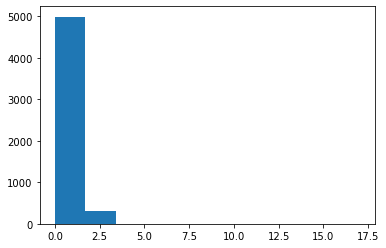

In [42]:
import matplotlib.pyplot as plt
plt.hist(operatorDataTx.numAssoc)

In [44]:
operatorDataTx.isnull().sum()
operatorDataTx = operatorDataTx[~operatorDataTx.unique_emails.isnull()]

In [45]:
operatorDataTx.columns

Index(['wallet', 'unique_emails', 'unique_nodes', 'minAuditSuccessRate',
       'avgAuditSuccessRate', 'maxAuditSuccessRate', 'minUptimeSuccessRate',
       'avgUptimeSuccessRate', 'maxUptimeSuccessRate', 'minAuditReputation',
       'avgAuditReputation', 'maxAuditReputation', 'minFreeDisk',
       'avgFreeDisk', 'maxFreeDisk', 'minPieceCount', 'avgPieceCount',
       'maxPieceCount', 'earliestNodeCreated', 'mostRecentNodeCreated',
       'fullWalletList', 'fullEmailList', 'numAssocWallets', 'numAssocEmails',
       '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
       '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
       '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
       'type', 'sixMonthPay', 'avgMonthPay', 'numOutbound', 'uniqueOutbound',
       'tokenTypes', 'numInbound', 'uniqueInbound', 'associatesTo',
       'associatesFrom', 'associates', 'numAssoc'],
      dtype='object')

In [47]:
#get rid of unique-emails, which duplicates numAssocEmails, and get rid of SuccessRate cols due to NaNs
cols = ['wallet', 'unique_nodes', 'minAuditReputation',
       'avgAuditReputation', 'maxAuditReputation', 'minFreeDisk',
       'avgFreeDisk', 'maxFreeDisk', 'minPieceCount', 'avgPieceCount',
       'maxPieceCount', 'earliestNodeCreated', 'mostRecentNodeCreated',
       'fullWalletList', 'fullEmailList', 'numAssocWallets', 'numAssocEmails',
       '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
       '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
       '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
       'type', 'sixMonthPay', 'avgMonthPay', 'numOutbound', 'uniqueOutbound',
       'tokenTypes', 'numInbound', 'uniqueInbound', 'associatesTo',
       'associatesFrom', 'associates', 'numAssoc']
operatorDataTx=operatorDataTx[cols]
operatorDataTx.isnull().sum()

wallet                   0
unique_nodes             0
minAuditReputation       0
avgAuditReputation       0
maxAuditReputation       0
minFreeDisk              0
avgFreeDisk              0
maxFreeDisk              0
minPieceCount            0
avgPieceCount            0
maxPieceCount            0
earliestNodeCreated      0
mostRecentNodeCreated    0
fullWalletList           0
fullEmailList            0
numAssocWallets          0
numAssocEmails           0
2020-02-01               0
2020-03-01               0
2020-04-01               0
2020-05-01               0
2020-06-01               0
2020-07-01               0
2020-08-01               0
2020-09-01               0
2020-10-01               0
2020-11-01               0
2020-12-01               0
2021-01-01               0
2021-02-01               0
2021-03-01               0
2021-04-01               0
type                     0
sixMonthPay              0
avgMonthPay              0
numOutbound              0
uniqueOutbound           0
t

In [48]:
len(operatorDataTx)

5310

In [49]:
'''operatorDataTx['outAll/outUnique'] = operatorDataTx.numOutbound/operatorDataTx.uniqueOutbound
operatorDataTx['inAll/inUnique'] = operatorDataTx.numInbound/operatorDataTx.uniqueInbound
'''

"operatorDataTx['outAll/outUnique'] = operatorDataTx.numOutbound/operatorDataTx.uniqueOutbound\noperatorDataTx['inAll/inUnique'] = operatorDataTx.numInbound/operatorDataTx.uniqueInbound\n"

In [50]:
operatorDataTx.to_pickle('operatorDataTx.pkl')